In [3]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

## Attendance Data

### Read the data from the attendance table and calculate an attendance percentage for each student. One half day is worth 50% of a full day, and 10 tardies is equal to one absence.

In [4]:
df = pd.read_csv('untidy-data/attendance.csv')

In [5]:
df.head()

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [7]:
df = df.rename(columns={'Unnamed: 0':'name'})

In [8]:
df.head()

,name,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [12]:
df = df.melt(id_vars='name', var_name='date', value_name='attend')

In [13]:
df.head()

,name,date,attend
0,Sally,2018-01-01,P
1,Jane,2018-01-01,A
2,Billy,2018-01-01,A
3,John,2018-01-01,P
4,Sally,2018-01-02,T


In [17]:
df.attend = df.attend.map({'P':1, 'H':.5, 'A':0, 'T':.9})

In [21]:
df.groupby('name').mean()

,attend
name,
Billy,0.5250
Jane,0.6875
John,0.9125
Sally,0.7625


### You should end up with something like this:

name

Billy    0.5250

Jane     0.6875

John     0.9125

Sally    0.7625

Name: grade, dtype: float64

## Coffee Levels

### Read the coffee_levels table.

In [72]:
df = pd.read_csv('untidy-data/coffee_levels.csv')
df.head()

,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279
3,11,x,0.335533
4,12,x,0.898291


### Transform the data so that each carafe is in it's own column.

In [73]:
df.hour.value_counts()

8     3
9     3
10    3
11    3
12    3
13    3
14    3
15    3
16    3
17    3
Name: hour, dtype: int64

In [74]:
df.coffee_carafe.value_counts()

x    10
y    10
z    10
Name: coffee_carafe, dtype: int64

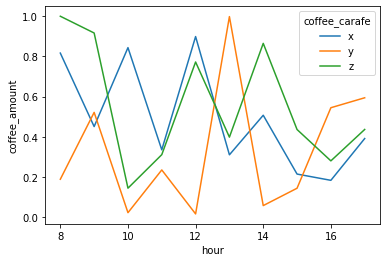

In [75]:
sns.lineplot(data=df, x='hour', y='coffee_amount', hue='coffee_carafe')
plt.show()

In [76]:
df.pivot(index='hour', columns='coffee_carafe')

coffee_amount                    
coffee_carafe             x         y         z
hour                                           
8                  0.816164  0.189297  0.999264
9                  0.451018  0.521502  0.915990
10                 0.843279  0.023163  0.144928
11                 0.335533  0.235529  0.311495
12                 0.898291  0.017009  0.771947
13                 0.310711  0.997464  0.398520
14                 0.507288  0.058361  0.864464
15                 0.215043  0.144644  0.436364
16                 0.183891  0.544676  0.280621
17                 0.391560  0.594126  0.436677

In [77]:
df

,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279
3,11,x,0.335533
4,12,x,0.898291
5,13,x,0.310711
6,14,x,0.507288
7,15,x,0.215043
8,16,x,0.183891
9,17,x,0.391560


### Is this the best shape for the data?

## Cake Recipes

### Read the cake_recipes table. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.

In [31]:
df = pd.read_csv('untidy-data/cake_recipes.csv')
df

,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084
5,c:top,71.306308,82.795477,92.098049,53.960273
6,d:bottom,52.799753,58.670419,51.747686,56.183110
7,d:top,96.873178,76.101363,59.571620,50.971626


### Tidy the data as necessary.

In [34]:
df = df.melt(id_vars='recipe:position', var_name='temp', value_name='score')

In [35]:
df

,recipe:position,temp,score
0,a:bottom,225,61.738655
1,a:top,225,51.709751
2,b:bottom,225,57.095320
3,b:top,225,82.455004
4,c:bottom,225,96.470207
5,c:top,225,71.306308
6,d:bottom,225,52.799753
7,d:top,225,96.873178
8,a:bottom,250,53.912627
9,a:top,250,52.009735


In [43]:
df[['recipe','position']] = df['recipe:position'].str.split(':', expand=True)

In [47]:
df = df.drop(columns='recipe:position')

In [48]:
df.head()

,temp,score,recipe,position
0,225,61.738655,a,bottom
1,225,51.709751,a,top
2,225,57.095320,b,bottom
3,225,82.455004,b,top
4,225,96.470207,c,bottom


### Which recipe, on average, is the best? recipe b

In [53]:
df.groupby('recipe').mean().idxmax()

score    b
dtype: object

In [54]:
df.groupby('recipe').mean().max()

score    76.736074
dtype: float64

### Which oven temperature, on average, produces the best results? 275

In [66]:
df.groupby('temp').mean().sort_values('score').tail(1)

,score
temp,
275,74.886754


In [67]:
df.groupby('temp').mean().max()

score    74.886754
dtype: float64

### Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees

In [70]:
df.groupby(['recipe','position','temp']).mean().idxmax()

score    (b, bottom, 300)
dtype: object

In [71]:
df.groupby(['recipe','position','temp']).mean().max()

score    99.248541
dtype: float64

### Bonus: explore the other tables in the tidy_data database and reshape them as necessary so that they are in a tidy format.